# Time series anomaly detection using Autoencoder
## Analysis of the Algorithm
### Author: [pavithrasv](https://github.com/pavithrasv)
### Second Author: [Zahangir](https://github.com/cs-joy)

In [2]:
import numpy as np
import pandas as pd
import keras
from keras import layers
import matplotlib.pyplot as plt

### Load data

Here is the data [source](https://github.com/numenta/NAB/tree/master/data) which we will use as our dataset.

and here is the kaggle source of the dataset: [kaggle](https://www.kaggle.com/datasets/boltzmannbrain/nab)

***About dataset: *** The Numenta Anomaly Benchmark (NAB) is a novel benchmark for evaluating algorithms for anomaly detection in streaming, online applications. It is comprised of over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real-time applications. All of the data and code is fully open-source, with extensive documentation, and a scoreboard of anomaly detection algorithms: [github.com/numenta/NAB](https://github.com/numenta/NAB). The full dataset is included here, but please go to the repo for details on how to evaluate anomaly detection algorithms on NAB.


Note: We will use `art_daily_small_noise.csv` file for training and `art_daily_jumpsup.csv` file for testing. Through the following dataset we can detect anomaly effectively.

In [3]:
data_source = "https://raw.githubusercontent.com/numenta/NAB/master/data/";
data_location = "artificialNoAnomaly/art_daily_small_noise.csv";
df_small_noise = pd.read_csv(
    data_source+data_location, parse_dates=True, index_col="timestamp"
)

data_location = "artificialWithAnomaly/art_daily_jumpsup.csv";
df_daily_jumpsup = pd.read_csv(
    data_source + data_location, parse_dates=True, index_col="timestamp"
)

print(df_small_noise.head())
print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


### Visualize the data

#### Timeseries data without anomalies

Following data will use as our training set

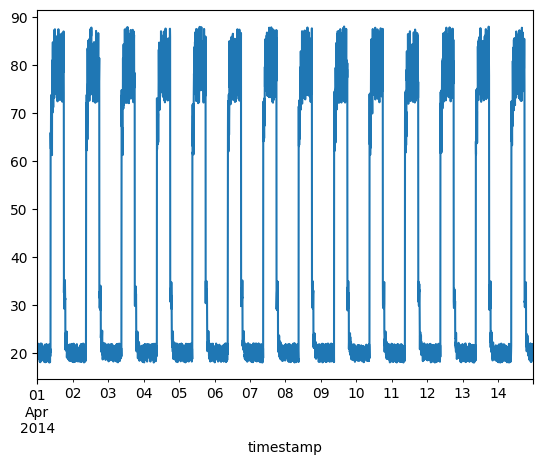

In [4]:
fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.show()

and the following dataset will use as our testing set

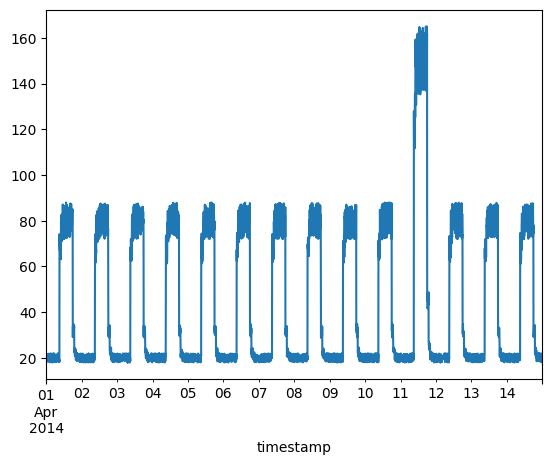

In [5]:
fix, ax = plt.subplots()
df_daily_jumpsup.plot(legend= False, ax=ax)
plt.show()

### Preparing the traing data
We have a `value` for every 5 mins for 14 days.
So,
- 24 * 60 / 5 = **288 timestamps** per day
- 288 * 14 = **4032 data points** in total

In [11]:
len(df_small_noise)

4032

In [6]:
## Normalize and save the mean and standard deviation we get
# z-score normalization -> z = /frac{x - mu}{sigma}; where, x = data(original value), mu = mean of the data and sigma is std(standard deviation) of the data
#############
'''
# Why Standardize data?
1. Centering the data
  1.1 Subtracting the mean to shifts the data distribution to be centered around 0.
  1.2 Gradient descent converges faster, because it helps to remove biases from the data.
2. Scaling to unit variance (std=1)
  2.1 Dividing by the std ensures that all features have the same scale(variance=1).
  2.2 Prevents features with larger magnitudes from dominating those with smaller magnitudes.
3. Improves models performance
4. Speed Up Training
5. Handling Outliers.

note: tree based models (random forest, XGBoost) don't require standardization because they split data based on relative values instead of distances.
'''


training_mean = df_small_noise.mean()
training_std = df_small_noise.std()

df_training_value = (df_small_noise - training_mean) / training_std;
print(f'Number of training samples: {len(df_training_value)}');

Number of training samples: 4032
